<a href="https://colab.research.google.com/github/Namsik-Yoon/pytorch_basic/blob/master/7.%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%EC%9D%98%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7. 자연어 처리의 전처리

이번 챕터에서는 자연어 처리의 전처리 과정을 이해합니다.

## 7.1 자연어 처리 전처리 이해하기

자연어 처리는 일반적으로 토큰화, 단어 집합 생성, 정수 인코딩, 패딩, 벡터화의 과정을 거칩니다. 이번 챕터에서는 이러한 전반적인 과정에 대해서 이해합니다.

### 7.1.1 토큰화(Tokenization)

주어진 텍스트를 단어 또는 문자 단위로 자르는 것을 토큰화라고 합니다. 예를 들어 주어진 문장이 다음과 같다고 해봅시다. 영어의 경우 토큰화를 사용하는 도구로서 대표적으로 spaCy와 NLTK가 있습니다. 물론, 파이썬 기본 함수인 split으로 토큰화를 할 수도 있습니다.

우선 영어에 대해서 토큰화 실습을 해봅시다.



```
en_text = "A Dog Run back corner near spare bedrooms"
```



1) spaCy 사용하기

In [0]:
import spacy
spacy_en = spacy.load('en')

In [0]:
def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

In [3]:
en_text = "A Dog Run back corner near spare bedrooms"
print(tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


2) NLTK 사용하기

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


3) 띄어쓰기로 토큰화

In [6]:
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


사실 영어의 경우에는 띄어쓰기 단위로 토큰화를 해도 단어들 간 구분이 꽤나 명확하기 때문에, 토큰화 작업이 수월합니다. 하지만 한국어의 경우에는 토큰화 작업이 훨씬 까다롭습니다. 그 이유는 한국어는 조사, 접사 등으로 인해 단순 띄어쓰기 단위로 나누면 같은 단어가 다른 단어로 인식되어서 단어 집합(vocabulary)의 크기가 불필요하게 커지기 때문입니다.



*   단어 집합(vocabuary)이란 중복을 제거한 텍스트의 총 단어의 집합(set)을 의미합니다.


예를 들어 단어 '사과'가 많이 들어간 어떤 문장에 띄어쓰기 토큰화를 한다면 '사과가', '사과를', '사과의', '사과와', '사과는'과 같은 식으로 같은 단어임에도 조사가 붙어서 다른 단어로 인식될 수 있습니다. 예를 통해 구체적으로 이해해봅시다.


4) 한국어 띄어쓰기 토큰화

In [7]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


위의 예제에서는 '사과'란 단어가 총 4번 등장했는데 모두 '의', '를', '가', '랑' 등이 붙어있어 이를 제거해주지 않으면 기계는 전부 다른 단어로 인식하게 됩니다.

5) 형태소 토큰화

위와 같은 상황을 방지하기 위해서 한국어는 보편적으로 '형태소 분석기'로 토큰화를 합니다. 여기서는 형태소 분석기 중에서 mecab을 사용해보겠습니다. 아래의 커맨드로 colab에서 mecab을 설치합니다.

[이게 뭐고](https://somjang.tistory.com/entry/Google-Colab%EC%97%90%EC%84%9C-Mecab-koMecab-ko-dic-%EC%89%BD%EA%B2%8C-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0)

In [8]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 60.5MB/s 
     |████████████████████████████████| 3.6MB 41.1MB/s 
     |████████████████████████████████| 92kB 7.9MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-05-21 14:09:08--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz

In [9]:
from konlpy.tag import Mecab
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


앞선 예와 다르게 '의','를', '가', '랑' 등이 전부 분리되어 기계는 '사과'라는 단어를 하나의 단어로 처리할 수 있습니다.

지금까지는 단어 또는 형태소 단위로 토큰화를 했지만 이보다도 더 작은 단위인 문자 단위로 토큰화를 수행하는 경우도 있습니다.

6) 문자 토큰화

In [10]:
print(list(en_text))

['A', ' ', 'D', 'o', 'g', ' ', 'R', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 'n', 'e', 'a', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']


간단히 토큰화에 대해서 알아봤습니다. 이제부터는 좀 더 많은 데이터를 가지고 실습해보겠습니다.

### 7.1.2 단어 집합(Vocabulary) 생성

단어 집합(vocabuary)이란 중복을 제거한 텍스트의 총 단어의 집합(set)을 의미합니다. 우선, 실습을 위해서 깃허브에서 '네이버 영화 리뷰 분류하기' 데이터를 다운로드하겠습니다. 네이버 영화 리뷰 데이터는 총 20만 개의 영화 리뷰를 긍정 1, 부정 0으로 레이블링한 데이터입니다.

In [0]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [26]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [27]:
print('전체 샘플의 수 : {}'.format(len(data)))

전체 샘플의 수 : 200000


In [0]:
sample_data = data[:100] # 임의로 100개만 저장

![대체 텍스트](https://www.jopenbusiness.com/mediawiki/images/thumb/b/b8/RegExp_Cheatsheets.png/700px-RegExp_Cheatsheets.png)

정규 표현식을 통해서 데이터를 정제합니다.

In [37]:
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
sample_data.loc[:10,]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


토큰화를 수행해보겠습니다. 토큰화 과정에서 불용어를 제거하기 위해 불용어를 우선 정의합니다.

In [0]:
# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

형태소 분석기는 mecab을 사용합니다.

In [0]:
tokenizer = Mecab()

In [44]:
temp = tokenizer.morphs(sample_data.loc[2,'document'])
print(temp)
temp = [word for word in temp if not word in stopwords]
print(temp)

['폴리스', '스토리', '시리즈', '는', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '최고']
['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고']


In [0]:
tokenized=[]
for sentence in sample_data['document']:
    temp = []
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)

In [46]:
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


이제 단어 집합을 만들어봅시다. NLTK에서는 빈도수 계산 도구인 FreqDist()를 지원합니다.

In [47]:
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 664


단어를 키(key)로, 단어에 대한 빈도수가 값(value)으로 저장되어져 있습니다. vocab에 단어를 입력하면 빈도수를 리턴합니다.

In [48]:
vocab['재밌']

10

'재밌'이란 단어가 총 10번 등장하였습니다. most_common()는 상위 빈도수를 가진 주어진 수의 단어만을 리턴합니다. 이를 사용하여 등장 빈도수가 높은 단어들을 원하는 개수만큼만 얻을 수 있습니다. 등장 빈도수 상위 500개의 단어만 단어 집합으로 저장해봅시다.

In [49]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 500


단어 집합의 크기가 500으로 줄어든 것을 확인할 수 있습니다.

### 7.1.3 각 단어에 고유한 정수 부여

enumerate()는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스를 순차적으로 함께 리턴한다는 특징이 있습니다. 인덱스 0과 1은 다른 용도로 남겨두고 나머지 단어들은 2부터 501까지 순차적으로 인덱스를 부여해봅시다.

In [0]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

이제 기존의 훈련 데이터에서 각 단어를 고유한 정수로 부여하는 작업을 진행해보겠습니다.

In [0]:
encoded = []
for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [36]:
print(encoded[:10])

[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29], [188, 5, 80, 189, 190, 191, 42, 192, 114, 5, 193, 194, 21, 115, 195, 196, 13, 51, 81, 116, 30, 42, 197, 117, 118, 31, 198, 5, 199, 200, 17, 114, 7, 82, 52, 17, 43, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84], [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11], [44, 33, 120, 210, 211, 212, 213, 68, 45, 34, 13, 214, 121, 15, 2, 215, 69, 8, 33, 3, 35], [216, 217, 218, 219, 7, 220, 17, 3], [122, 5, 21, 36, 43, 123, 124, 53, 118, 31, 85, 5, 14, 7, 3], [125, 37, 221, 41, 79, 37], [120, 222, 55, 223, 55, 86, 224, 46, 9, 4, 47, 25], [56], [225, 87, 88, 226, 227, 57, 89]]


### 7.1.4 길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩(padding)

이제 길이가 다른 리뷰들을 모두 동일한 길이로 바꿔주는 패딩 작업을 진행해보겠습니다. 앞서 단어 집합에 패딩을 위한 토큰인 'pad'를 추가했었습니다. 패딩 작업은 정해준 길이로 모든 샘플들의 길이를 맞춰주되, 길이가 정해준 길이보다 짧은 샘플들에는 'pad' 토큰을 추가하여 길이를 맞춰주는 작업입니다.

리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.900000


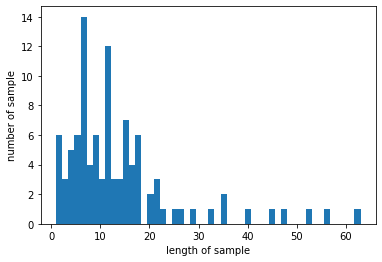

In [51]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [0]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [53]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 63
리뷰의 평균 길이 : 63.000000


지면의 한계로 인해 상위 3개의 샘플들만 출력해보겠습니다.

In [54]:
print(encoded[:3])

[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [188, 5, 80, 189, 190, 191, 42, 192, 114, 5, 193, 194, 21, 115, 195, 196, 13, 51, 81, 116, 30, 42, 197, 117, 118, 31, 198, 5, 199, 200, 17, 114, 7, 82, 52, 17, 43, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


이제 단어들을 고유한 정수로 맵핑하였으니, 각 정수를 고유한 단어 벡터로 바꾸는 작업이 필요합니다. 단어 벡터를 얻는 방법은 크게 원-핫 인코딩과 워드 임베딩이 있는데, 주로 워드 임베딩이 사용됩니다. 원-핫 인코딩과 워드 임베딩에 대해서는 9챕터에서 다룹니다.

9챕터로 넘어가기 전에 우리가 배워야 할 것은 방금 했던 과정을 좀 더 쉽게 수행해주는 파이토치의 토치텍스트라는 도구입니다.

## 7.2 토치텍스트 튜토리얼(Torchtext tutorial) - 영어

파이토치(PyTorch)에서는 텍스트에 대한 여러 추상화 기능을 제공하는 자연어 처리 라이브러리 토치텍스트(Torchtext)를 제공합니다. 자연어 처리를 위해 토치텍스트가 반드시 필요하진 않지만, 때로는 직접 구현하는 것보다 이를 사용하는 것이 더 편리하기도 합니다.

토치텍스트가 제공하는 기능들은 다음과 같습니다.



*   파일 로드하기(File Loading) : 다양한 포맷의 코퍼스를 로드합니다.
*   토큰화(Tokenization) : 문장을 단어 단위로 분리해줍니다.
*   단어 집합(Vocab) : 단어 집합을 만듭니다.
*   정수 인코딩(Integer encoding) : 전체 코퍼스의 단어들을 각각의 고유한 정수로 맵핑합니다.
*   단어 벡터(Word Vector) : 단어 집합의 단어들에 고유한 임베딩 벡터를 만들어줍니다. 랜덤값으로 초기화한 값일 수도 있고, 사전 훈련된 임베딩 벡터들을 로드할 수도 있습니다.
*   배치화(Batching) : 훈련 샘플들의 배치를 만들어줍니다. 이 과정에서 패딩 작업(Padding)도 이루어집니다.

토치텍스트가 모든 전처리를 해결해주지는 않습니다. 위 모든 과정 이전에 훈련 데이터, 검증 데이터, 테스트 데이터를 분리하는 작업은 별도로 해주어야 하며 위 모든 과정 이후에 각 샘플에 대해서 단어들을 임베딩 벡터로 맵핑해주는 작업. 룩업 테이블(Lookup Table)이라 불리는 작업은 파이토치의 nn.Embedding()을 통해서 해결해야 합니다. 이에 대해서는 다음 챕터에서 다룹니다.

프롬프트에서 아래의 명령을 통해 설치합니다.



```
pip install torchtext
```

이번 챕터에서는 대표적인 영어 데이터인 IMDB 리뷰 데이터를 사용할 것입니다. 토치텍스트 실습에 앞서 데이터를 다운로드하고 훈련 데이터와 테스트 데이터로 분리하는 전처리를 우선 진행해보겠습니다.



### 7.2.1 훈련 데이터와 테스트 데이터로 분리하기

이번 실습에 사용할 IMDB 리뷰 데이터를 다운로드 받아 이를 훈련 데이터와 테스트 데이터로 분리하여 csv 파일로 저장해두겠습니다.

In [0]:
import urllib.request
import pandas as pd

우선 인터넷에서 IMDB 리뷰 데이터를 다운로드 받습니다.

In [114]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7faac2ce0080>)

다운로드한 IMDB 리뷰 데이터를 데이터프레임에 저장하고, 상위 5개의 행만 출력해보겠습니다.

In [115]:
df = pd.read_csv('IMDb_Reviews.csv', encoding='latin1')
df.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


IMDB 리뷰 데이터는 두 개의 열로 구성되는데, 첫번째 열은 review 열로 영화 리뷰에 해당되는 데이터입니다. 두번째 열은 sentiment로 해당 리뷰가 긍정인지 부정인지를 나타내는 열입니다. 이는 레이블에 해당됩니다. 1은 긍정, 0은 부정을 나타냅니다.

전체 샘플의 개수를 보겠습니다.

In [116]:
print('전체 샘플의 개수 : {}'.format(len(df)))

전체 샘플의 개수 : 50000


전체 샘플의 개수는 50,000개입니다. 25,000개씩 분리하여 훈련 데이터와 테스트 데이터로 분리해보겠습니다.

In [0]:
train_df = df[:25000]
test_df = df[25000:]

상위 25,000개의 행은 train_df에 하위 25,000개의 행은 test_df에 저장하였습니다. 각각 훈련 데이터와 테스트 데이터입니다. 이 둘을 각각 훈련 데이터는 train_data.csv 파일에 테스트 데이터는 test_data.csv 파일에 저장하겠습니다.

In [0]:
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

index=False를 하면 인덱스를 저장하지 않습니다.

### 7.2.2 필드 정의하기(torchtext.data)

torchtext.data에는 필드(Field)라는 도구를 제공합니다. 필드를 통해 앞으로 어떤 전처리를 할 것인지를 정의합니다.

(torchvision의 transforms 같은 역할인듯)

In [0]:
from torchtext import data # torchtext.data 임포트

# 필드 정의
TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=str.split,
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   batch_first=False,
                   is_target=True)

위 코드에서는 두 개의 필드 객체를 정의하였습니다. 하나는 실제 텍스트를 위한 TEXT 객체, 하나는 레이블 데이터를 위한 LABEL 객체입니다. 각 인자가 의미하는 바는 다음과 같습니다.



*   sequential : 시퀀스 데이터 여부. (True가 기본값)
*   use_vocab : 단어 집합을 만들 것인지 여부. (True가 기본값)
*   tokenize : 어떤 토큰화 함수를 사용할 것인지 지정. (string.split이 기본값)
*   lower : 영어 데이터를 전부 소문자화한다. (False가 기본값)
*   batch_first : 미니 배치 차원을 맨 앞으로 하여 데이터를 불러올 것인지 여부. (False가 기본값)
*   is_target : 레이블 데이터 여부. (False가 기본값)
*   fix_length : 최대 허용 길이. 이 길이에 맞춰서 패딩 작업(Padding)이 진행된다.

주의할 점은 위의 필드는 어떻게 전처리를 진행할 것인지를 정의한 것이고, 실제 훈련 데이터에 대해서 전처리는 진행하지 않았습니다. 사실, 아직 훈련 데이터를 다운로드 받지도 않았습니다.







### 7.2.3 데이터셋 만들기

In [0]:
from torchtext.data import TabularDataset

필드를 지정했다면 이제 데이터셋을 만들어야 합니다. TabularDataset은 데이터를 불러오면서 필드에서 정의했던 토큰화 방법으로 토큰화를 수행합니다. 이때, 소문자화 같은 기본적인 전처리도 함께 이루어집니다.

In [0]:
train_data, test_data = TabularDataset.splits(
    path='.', train='train_data.csv', test='test_data.csv', format='csv',
    fields=[('text', TEXT), ('label', LABEL)], skip_header=True)



*   path : 파일이 위치한 경로.
*   format : 데이터의 포맷.
*   fields : 위에서 정의한 필드를 지정. 첫번째 원소는 데이터 셋 내에서 해당 필드를 호칭할 이름, 두번째 원소는 지정할 필드.
*   skip_header : 데이터의 첫번째 줄은 무시.

훈련 데이터와 테스트 데이터를 csv 파일로 불러와 분리해서 저장해주었는데, 데이터의 크기를 다시 확인해보겠습니다.



In [122]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 25000
테스트 샘플의 개수 : 25000


앞서 확인했던 것과 같이 각각 25,000개의 샘플이 존재합니다. vars()를 통해서 주어진 인덱스의 샘플을 확인할 수 있습니다. 훈련 데이터의 첫번째 샘플을 확인해봅시다.

In [123]:
print(vars(train_data[0]))

{'text': ['my', 'family', 'and', 'i', 'normally', 'do', 'not', 'watch', 'local', 'movies', 'for', 'the', 'simple', 'reason', 'that', 'they', 'are', 'poorly', 'made,', 'they', 'lack', 'the', 'depth,', 'and', 'just', 'not', 'worth', 'our', 'time.<br', '/><br', '/>the', 'trailer', 'of', '"nasaan', 'ka', 'man"', 'caught', 'my', 'attention,', 'my', 'daughter', 'in', "law's", 'and', "daughter's", 'so', 'we', 'took', 'time', 'out', 'to', 'watch', 'it', 'this', 'afternoon.', 'the', 'movie', 'exceeded', 'our', 'expectations.', 'the', 'cinematography', 'was', 'very', 'good,', 'the', 'story', 'beautiful', 'and', 'the', 'acting', 'awesome.', 'jericho', 'rosales', 'was', 'really', 'very', 'good,', "so's", 'claudine', 'barretto.', 'the', 'fact', 'that', 'i', 'despised', 'diether', 'ocampo', 'proves', 'he', 'was', 'effective', 'at', 'his', 'role.', 'i', 'have', 'never', 'been', 'this', 'touched,', 'moved', 'and', 'affected', 'by', 'a', 'local', 'movie', 'before.', 'imagine', 'a', 'cynic', 'like', 'me

앞서 TabularDataset의 fields 인자로 TEXT 필드는 text로 호칭하고, LABEL 필드는 label로 호칭한다고 지정한 바 있습니다. 실제로 위의 코드 결과는 text 필드와 label 필드 두 가지로 구성됩니다. text 필드에 저장된 영화 리뷰를 보면 현재 토큰화가 진행된 것을 확인할 수 있습니다. 아래의 코드로 현재 데이터셋의 필드 구성을 별도 확인할 수 있습니다.

In [124]:
# 필드 구성 확인.
print(train_data.fields.items())

dict_items([('text', <torchtext.data.field.Field object at 0x7faac2c927f0>), ('label', <torchtext.data.field.Field object at 0x7faac2c92780>)])


### 7.2.4 단어 집합(Vocabulary) 만들기

토큰화 전처리를 끝냈다면, 이제 각 단어에 고유한 정수를 맵핑해주는 정수 인코딩(Integer enoding) 작업이 필요합니다. 그리고 이 전처리를 위해서는 우선 단어 집합을 만들어주어야 합니다.

정의한 필드에 .build_vocab() 도구를 사용하면 단어 집합을 생성합니다.

In [0]:
TEXT.build_vocab(train_data, min_freq=10, max_size=10000)



*   min_freq : 단어 집합에 추가 시 단어의 최소 등장 빈도 조건을 추가.
*   max_size : 단어 집합의 최대 크기를 지정.

생성된 단어 집합의 크기를 확인해봅시다.



In [87]:
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 10002


생성된 단어 집합 내의 단어들은 .stoi를 통해서 확인 가능합니다.

In [88]:
print(TEXT.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7fab8b7ff620>, {'<unk>': 0, '<pad>': 1, 'the': 2, 'a': 3, 'and': 4, 'of': 5, 'to': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'it': 11, 'that': 12, '/><br': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'but': 18, 'on': 19, 'movie': 20, 'his': 21, 'not': 22, 'are': 23, 'you': 24, 'film': 25, 'have': 26, 'he': 27, 'be': 28, 'at': 29, 'one': 30, 'by': 31, 'an': 32, 'they': 33, 'from': 34, 'who': 35, 'all': 36, 'like': 37, 'so': 38, 'just': 39, 'or': 40, 'has': 41, 'about': 42, "it's": 43, 'if': 44, 'her': 45, 'some': 46, 'out': 47, 'what': 48, 'very': 49, 'when': 50, 'more': 51, 'there': 52, 'even': 53, 'would': 54, 'my': 55, 'good': 56, 'she': 57, 'their': 58, 'only': 59, 'no': 60, 'really': 61, 'can': 62, 'up': 63, 'had': 64, 'which': 65, 'see': 66, 'were': 67, 'than': 68, '-': 69, 'we': 70, 'been': 71, 'into': 72, 'get': 73, 'much': 74, 'will': 75, 'because': 76, 'story': 77, 'most': 78, 'how': 79, 'other': 80, 'its': 81, 'first': 82, "don

단어 집합의 크기를 10,000개로 제한하였지만 실제 생성된 단어 집합의 크기는 0번 단어부터 10,001번 단어까지 총 10,002개입니다. 이는 토치텍스트가 임의로 특별 토큰인 < unk >와 < pad >를 추가하였기 때문입니다. 토치텍스트는 < unk >의 번호는 0번, < pad >의 번호는 1번을 부여하였습니다. < unk >는 단어 집합에 없는 단어를 표현할 때 사용되며, < pad >는 길이를 맞추는 패딩 작업을 할 때 사용됩니다.

### 7.2.5 토치텍스트의 데이터로더 만들기

데이터로더는 데이터셋에서 미니 배치만큼 데이터를 로드하게 만들어주는 역할을 합니다. 토치텍스트에서는 Iterator를 사용하여 데이터로더를 만듭니다.

In [0]:
from torchtext.data import Iterator

임의로 배치 크기를 아주 작은 배치 크기인 5로 정해보겠습니다.

In [0]:
batch_size = 5

In [0]:
train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

In [98]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 5000
테스트 데이터의 미니 배치 수 : 5000


훈련 데이터와 테스트 데이터 모두 미니 배치의 수가 5,000개인데 이는 25,000개의 샘플을 배치 크기 5씩 묶어주었기 때문입니다. 첫번째 미니 배치를 받아와서 batch라는 변수에 저장해보겠습니다.

In [0]:
batch = next(iter(train_loader)) # 첫번째 미니배치

첫번째 미니배치의 자료형을 확인해보겠습니다.

In [100]:
print(type(batch))

<class 'torchtext.data.batch.Batch'>


앞서 배운 일반적인 데이터로더와 토치텍스트의 데이터로더는 조금 다른데, 일반적인 데이터로더는 미니 배치를 텐서로 가져오지만 토치텍스트의 데이터로더는 torchtext.data.batch.Batch 객체를 가져오는 것을 볼 수 있습니다. 실제 데이터 텐서에 접근하기 위해서는 정의한 필드명을 사용해야 합니다.

첫번째 미니 배치의 text 필드를 호출해봅시다.

In [101]:
print(batch.text)

tensor([[  10,  927,    7,  231,    0,  223,    9, 1179,    3,  941,    5,  104,
         3060,    6,   28,    2,  649,  754,   25,  124],
        [ 186,  120,    3,  167,    5,  994,    8,   55, 1444,   18,    0, 1120,
         6343,  276,    2,    0,    9,  202,    3, 1058],
        [   6,  134,   35,  141,   12,   10,   20,  996,  237, 2097,    2,    0,
         2077,   12,   11,    0,    9,    0,   10,    7],
        [7002,   10,   61,    7,    0,  490, 4010,    9,  224, 1053,   16,  259,
           35,  183,   26, 1059,   58,  330,    6,   66],
        [   0, 3429,    7,    3, 5776, 1238,    5,    2,    0,   20,    0, 3290,
            0,    0,  110,    0,    4,    8,   55, 1759]])


배치 크기가 5이기 때문에 5개의 샘플이 출력되는 것을 볼 수 있습니다. 각 샘플의 길이는 20의 길이를 가지는데, 이는 앞서 초기에 필드를 정의할 때 fix_length를 20으로 정해주었기 때문입니다. 다시 말해 하나의 미니 배치의 크기는 (배치 크기 × fix_length)입니다.

또한, 각 샘플은 더 이상 단어 시퀀스가 아니라 정수 시퀀스임을 볼 수 있습니다. 각 단어는 단어 집합에서 정해진대로 각 단어에 맵핑되는 고유한 정수로 변환된 상태입니다. 각 샘플의 중간, 중간에는 숫자 0이 존재하는데 이는 < unk > 토큰의 번호로 단어 집합에 포함되지 못한 단어들은 < unk >라는 토큰으로 변환되었습니다.

### 7.2.6 < pad >토큰이 사용되는 경우

< pad > 토큰이 어떤 경우에 사용되는지 보겠습니다. 맨 처음 필드를 정의할 때 fix_length를 20이 아니라 1000으로 정의하고, 이후에는 데이터로더를 정의하기까지 모든 실습을 동일하게 진행했다고 가정해봅시다. 그리고 첫번째 미니배치의 첫번째 샘플을 출력해봅시다.

In [0]:
from torchtext import data # torchtext.data 임포트

# 필드 정의
TEXT_ = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=str.split,
                  lower=True,
                  batch_first=True,
                  fix_length=1000)

LABEL_ = data.Field(sequential=False,
                   use_vocab=False,
                   batch_first=False,
                   is_target=True)

In [0]:
train_data_, test_data_ = TabularDataset.splits(
    path='.', train='train_data.csv', test='test_data.csv', format='csv',
    fields=[('text', TEXT_), ('label', LABEL_)], skip_header=True)

TEXT_.build_vocab(train_data_, min_freq=10, max_size=10000)

In [0]:
train_loader_ = Iterator(dataset=train_data_, batch_size = batch_size)
test_loader_ = Iterator(dataset=test_data_, batch_size = batch_size)

In [145]:
batch = next(iter(train_loader_)) # 첫번째 미니배치
print(batch.text[0]) # 첫번째 미니배치 중 첫번째 샘플

tensor([  10,  927,    7,  231,    0,  223,    9, 1179,    3,  941,    5,  104,
        3060,    6,   28,    2,  649,  754,   25,  124, 1055,  625,  249,   10,
        2300,   63,  396,   92,   20,    8, 1458,    5, 5038, 2779,  563,    0,
        3097, 3818,   40,   92,   80, 1313,    5, 6934,   43, 2331,  450,    8,
          36,    5,  116,  400,    3,  303, 1473,    8,    3, 2316,    5,    0,
           0,  103,   13,   93, 3457,    5,   10,   25,    7,  711,    2,   78,
        9425, 5793,    8,    2,  632,    5, 1677,    9,   62,   98,    5,   60,
          80,   25,  106,  140,    0,  673, 4156,  155,   80, 7654,  171,    0,
           0, 3333,  175,    6,   26,   95,    3,   20,   12, 2331,    0,    2,
         565,    6,    0,   11,   19,    2,   78, 4022,    5, 5882,    3, 1408,
           0, 3930,  183,   28,  557,  400,    3,    0,    5,    0,  104,    0,
           3, 2609,    5,  750,    0,   34,    3, 3119,    0,    3, 5855,    5,
           0, 1027,  400,   18,  626,   

샘플의 뒷 부분이 < pad >의 번호였던 숫자 1로 채워진 것을 볼 수 있습니다. 이는 기존 샘플의 길이가 1000이 되지 않기 때문에, 숫자 1을 채워서 샘플의 길이를 1000으로 맞춰준 것입니다. 이와 같이 서로 다른 길이의 샘플들을 동일한 길이로 맞춰추는 작업을 패딩 작업(Padding)이라고 합니다.

## 7.3 토치텍스트 튜토리얼(Torchtext tutorial) - 한국어

이번 챕터는 바로 앞 챕터인 토치텍스트 영어 데이터 챕터를 이미 진행했다고 가정하고 진행됩니다.

### 7.3.1 형태소 분석기 Mecab 설치

In [146]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-05-21 15:15:57--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.2, 18.205.93.1, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.0|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=GFbnwJX7VqUzTIua7Izr%2FsME888%3D&Expires=1590075957&AWSAccessKeyId=AKIA6KOSE3

### 7.3.2 훈련 데이터와 테스트 데이터로 다운로드 하기

In [0]:
import urllib.request
import pandas as pd

네이버 영화 리뷰 데이터를 다운로드합니다. 훈련 데이터는 ratings_train.txt, 테스트 데이터는 ratings_test.txt에 입니다.

In [148]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7faad7ae09b0>)

데이터의 구성을 확인하기 위해서 훈련 데이터는 train_df, 테스트 데이터는 test_df에 저장합니다

In [0]:
train_df = pd.read_table('ratings_train.txt')
test_df = pd.read_table('ratings_test.txt')

훈련 데이터의 상위 5개의 행을 출력해봅니다.

In [150]:
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


테스트 데이터의 상위 5개의 행을 출력해봅니다.

In [151]:
test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


훈련 데이터와 테스트 데이터 모두 id, document, label이라는 3개의 열로 구성됩니다. document 열은 영화 리뷰에 해당되며, label 열은 해당 리뷰가 긍정인지 부정인지에 대한 레이블로 구성되어져 있습니다. id 열은 여기서는 불필요합니다. 샘플의 개수를 봅시다.

In [152]:
print('훈련 데이터 샘플의 개수 : {}'.format(len(train_df)))
print('테스트 데이터 샘플의 개수 : {}'.format(len(test_df)))

훈련 데이터 샘플의 개수 : 150000
테스트 데이터 샘플의 개수 : 50000


훈련 데이터의 리뷰는 15만개, 테스트 데이터의 리뷰는 5만개가 있습니다.

### 7.3.3 필드 정의하기(torchtext.data)

In [0]:
from torchtext import data # torchtext.data 임포트
from konlpy.tag import Mecab

토크나이저. 다시 말해 토큰화 도구로는 형태소 분석기 Mecab을 사용합니다.

In [0]:
# Mecab을 토크나이저로 사용
tokenizer = Mecab()

네이버 영화 리뷰 데이터는 3개의 열로 구성되어져 있으므로 3개의 필드를 정의합니다.

In [0]:
# 필드 정의
ID = data.Field(sequential = False,
                use_vocab = False) # 실제 사용은 하지 않을 예정

TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=tokenizer.morphs, # 토크나이저로는 Mecab 사용.
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   is_target=True)

### 7.3.4 데이터셋 만들기

In [0]:
from torchtext.data import TabularDataset

이제 데이터를 불러와서 데이터셋의 형식으로 바꿔주고, 그와 동시에 토큰화를 수행해봅시다.

In [0]:
train_data, test_data = TabularDataset.splits(
        path='.', train='ratings_train.txt', test='ratings_test.txt', format='tsv',
        fields=[('id', ID), ('text', TEXT), ('label', LABEL)], skip_header=True)

데이터셋으로 변환된 샘플의 개수를 확인해봅시다.

In [163]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 150000
테스트 샘플의 개수 : 50000


앞서 확인했듯이 각각 15만개와 5만개입니다. 토큰화가 되었는지 확인하기위해 훈련 데이터의 첫번째 샘플을 출력해봅시다.

In [164]:
print(vars(train_data[0]))

{'id': '9976970', 'text': ['아', '더', '빙', '.', '.', '진짜', '짜증', '나', '네요', '목소리'], 'label': '0'}


### 7.3.5 단어 집합(Vocabulary) 만들기

정의한 필드에 .build_vocab() 도구를 사용하면 단어 집합을 생성합니다.

In [171]:
TEXT.build_vocab(train_data, min_freq=1)
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 53452


In [0]:
TEXT.build_vocab(train_data, min_freq=10, max_size=10000)



*   min_freq : 단어 집합에 추가 시 단어의 최소 등장 빈도 조건을 추가.
*   max_size : 단어 집합의 최대 크기를 지정.



생성된 단어 집합의 크기를 확인해봅시다.

In [173]:
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 10002


생성된 단어 집합 내의 단어들은 .stoi를 통해서 확인 가능합니다.

In [174]:
print(TEXT.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7fab8b7ff620>, {'<unk>': 0, '<pad>': 1, '.': 2, '이': 3, '는': 4, '영화': 5, '다': 6, '고': 7, '하': 8, '도': 9, '의': 10, '가': 11, '은': 12, '에': 13, '을': 14, '보': 15, '한': 16, '..': 17, '게': 18, ',': 19, '들': 20, '!': 21, '지': 22, '를': 23, '있': 24, '없': 25, '?': 26, '좋': 27, '나': 28, '었': 29, '만': 30, '는데': 31, '너무': 32, '봤': 33, '적': 34, '안': 35, '정말': 36, '로': 37, '음': 38, '으로': 39, '것': 40, '아': 41, '네요': 42, '재밌': 43, '어': 44, '점': 45, '같': 46, '지만': 47, '진짜': 48, '했': 49, '에서': 50, '기': 51, '네': 52, '않': 53, '거': 54, '았': 55, '수': 56, '되': 57, '면': 58, 'ㅋㅋ': 59, '과': 60, '말': 61, '연기': 62, '인': 63, '잘': 64, '최고': 65, '주': 66, '내': 67, '~': 68, '평점': 69, '이런': 70, '어요': 71, '던': 72, '와': 73, '할': 74, '왜': 75, '1': 76, '겠': 77, '해': 78, '스토리': 79, '습니다': 80, 'ㅋㅋㅋ': 81, '...': 82, '드라마': 83, '생각': 84, '아니': 85, '더': 86, '그': 87, '싶': 88, '사람': 89, '듯': 90, '감동': 91, '때': 92, '함': 93, '배우': 94, '본': 95, '까지': 96, '좀': 97, '뭐': 98, '볼': 99, '알': 10

단어 집합의 크기를 10,000개로 제한하였고, 임의로 특별 토큰인 < unk >와 < pad >이 추가되면서 실제 생성된 단어 집합의 크기는 0번 단어부터 10,001번 단어까지 총 10,002개입니다.

### 7.3.6 토치텍스트의 데이터로더 만들기

데이터로더는 데이터셋에서 미니 배치만큼 데이터를 로드하게 만들어주는 역할을 합니다. 토치텍스트에서는 Iterator를 사용하여 데이터로더를 만듭니다.

In [0]:
from torchtext.data import Iterator

임의로 배치 크기를 아주 작은 배치 크기인 5로 정해보겠습니다.

In [0]:
batch_size = 5
train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

In [177]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 30000
테스트 데이터의 미니 배치 수 : 10000


훈련 데이터와 테스트 데이터터를 배치 크기 5씩 묶어주었으므로 훈련 데이터의 미니 배치 수는 30,000개, 테스트 데이터의 미니 배치 수는 10,000개입니다. 첫번째 미니 배치를 받아와서 batch라는 변수에 저장하고, 첫번째 미니 배치의 text 필드를 호출해봅시다.

In [178]:
batch = next(iter(train_loader)) # 첫번째 미니배치
print(batch.text)

tensor([[3922,   50, 2811,  922,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1],
        [  36,   28, 3890, 1204,  149,  320,  100,   56,   11,   25,    6,    1,
            1,    1,    1,    1,    1,    1,    1,    1],
        [5509,   19,    0,   10,  205, 1653,   94,   11, 1762,   16,   65,   10,
            5,    6,  180,  415,   70,    5,   23,   15],
        [3972,  166,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1],
        [5053,    3,  149,  401,   30,   39,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1]])


배치 크기가 5이기 때문에 5개의 샘플이 출력되는 것을 볼 수 있습니다. 각 샘플의 길이는 20의 길이를 가지는데, 이는 앞서 초기에 필드를 정의할 때 fix_length를 20으로 정해주었기 때문입니다. 다시 말해 하나의 미니 배치의 크기는 (배치 크기 × fix_length)입니다.

샘플의 중간, 중간에는 숫자 0이 존재하는데 이는 단어 집합에 포함되지 못한 단어들은 < unk >라는 토큰으로 변환되었음을 의미합니다. 또한 기존 샘플 길이가 20보다 작았던 샘플들은 뒤에 < pad > 토큰의 번호인 숫자 1로 패딩되었습니다.